# Figures for Chapter 2

In [1]:
%matplotlib inline

In [2]:
%config InlineBackend.figure_formats = set(['png'])

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
import numpy as np

## Indexing methods for numpy arrays

In [5]:
def show_array(shape, sel, filename=None):
    """
    Visualize indexing of arrays
    """
    
    data = np.zeros(shape)
    exec("data[%s] = 1" % sel)
    
    fig, ax = plt.subplots(1, 1, figsize=shape)
    ax.set_frame_on(False)

    ax.patch.set_facecolor('white')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())
    
    size = 0.96
    for (m, n), w in np.ndenumerate(data):
        color = '#1199ff' if w > 0 else '#eeeeee'
        rect = plt.Rectangle([n -size/2, m -size/2], 
                             size, size, 
                             facecolor=color,
                             edgecolor=color)
        ax.add_patch(rect)
        ax.text(n, m, "(%d, %d)" % (m, n), ha='center',
                                           va='center',
                                           fontsize=12)
    ax.autoscale_view()
    ax.invert_yaxis()
    
    if sel ==":, :":
        ax.set_title("data\n", fontsize=12)
    else:
        ax.set_title("data[%s]\n" % sel, fontsize=12)
        
    if filename:
        fig.savefig(filename + ".png", dpi=200)
        fig.savefig(filename + ".svg")
        fig.savefig(filename + ".pdf")


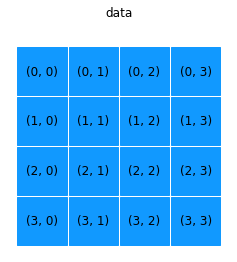

In [6]:
show_array((4, 4), ":, :", "./figs/array_indexing_01")

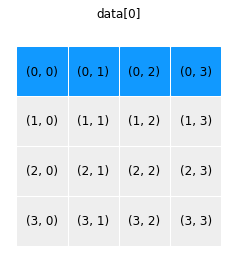

In [7]:
show_array((4, 4), "0", "./figs/array_indexing_02")

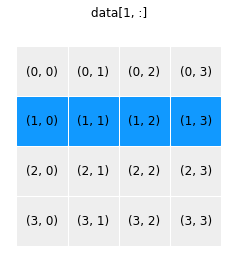

In [8]:
show_array((4, 4), "1, :", "./figs/array_indexing_03")

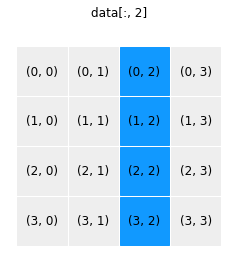

In [9]:
show_array((4, 4), ":, 2", "./figs/array_indexing_04")

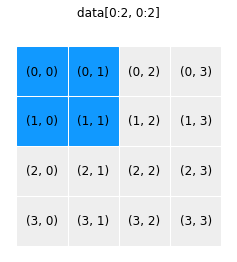

In [10]:
show_array((4, 4), "0:2, 0:2", "./figs/array_indexing_05")

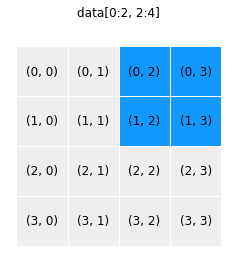

In [11]:
show_array((4, 4), "0:2, 2:4", "./figs/array_indexing_06")

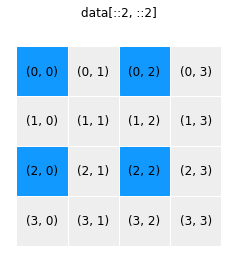

In [12]:
show_array((4, 4), "::2, ::2", "./figs/array_indexing_07")

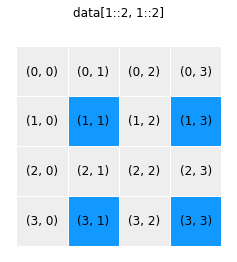

In [13]:
show_array((4, 4), "1::2, 1::2", "./figs/array_indexing_08")

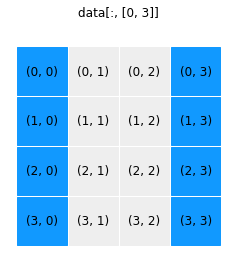

In [14]:
show_array((4, 4), ":, [0, 3]", "./figs/array_indexing_09")

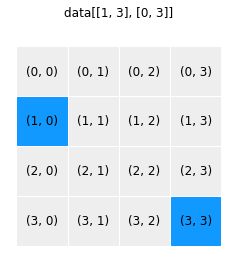

In [15]:
show_array((4, 4), "[1, 3], [0, 3]", "./figs/array_indexing_10")

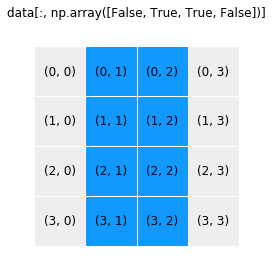

In [16]:
show_array((4, 4), ":, np.array([False, True, True, False])", "./figs/array_indexing_11")

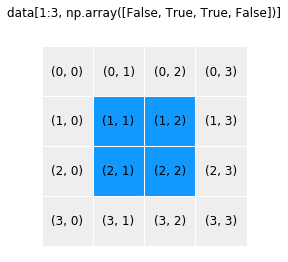

In [17]:
show_array((4, 4), "1:3, np.array([False, True, True, False])", "./figs/array_indexing_12")

### Summary

<table>
<tr>
<td><img src="./figs/array_indexing_01.svg"></td>
<td><img src="./figs/array_indexing_02.svg"></td>
<td><img src="./figs/array_indexing_03.svg"></td>
<td><img src="./figs/array_indexing_04.svg"></td>
</tr>
<tr>
<td><img src="./figs/array_indexing_05.svg"></td>
<td><img src="./figs/array_indexing_06.svg"></td>
<td><img src="./figs/array_indexing_07.svg"></td>
<td><img src="./figs/array_indexing_08.svg"></td>
</tr>
<tr>
<td><img src="./figs/array_indexing_09.svg"></td>
<td><img src="./figs/array_indexing_10.svg"></td>
<td><img src="./figs/array_indexing_11.svg"></td>
<td><img src="./figs/array_indexing_12.svg"></td>
</tr>
</table>

## Aggregation

In [18]:
data = np.arange(9).reshape(3, 3); data

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [19]:
data.sum()

36

In [20]:
data.sum(axis=0)

array([ 9, 12, 15])

In [21]:
data.sum(axis=1)

array([ 3, 12, 21])

In [22]:
def show_array_aggregation(data, axis, filename=None):
    """
    Visualize aggregation of arrays
    """

    colors = ['#1199ff', '#ee3311', '#66ff22']
    
    fig, axes = plt.subplots(2, 1, figsize=(4, 8))
    
    # -- data --
    ax = axes[0]
    ax.set_frame_on(False)
    ax.patch.set_facecolor('white')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())
       
    size = 0.96
    for (m, n), w in np.ndenumerate(data):

        if axis is None:
            color = colors[0]
        elif axis == 1:
            color = colors[m]
        else:
            color = colors[n]
            
        rect = plt.Rectangle([n -size/2, m -size/2],
                             size, size,
                             facecolor=color,
                             edgecolor=color)
        ax.add_patch(rect)

        ax.text(n, m, "%d" % data[m, n], ha='center', va='center', fontsize=14)
        
    ax.autoscale_view()
    ax.invert_yaxis()
    ax.set_title("data", fontsize=12)

    # -- data aggregation -- 
    
    if axis is None:
        adata = np.atleast_2d(data.sum())
    elif axis == 0:
        adata = data.sum(axis=axis)[:, np.newaxis]
    else:
        adata = data.sum(axis=axis)[:, np.newaxis]     
   
    ax = axes[1]
    ax.set_frame_on(False)
    ax.patch.set_facecolor('white')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())
    
    size = 1.0
    for (m, n), w in np.ndenumerate(data):
        color = 'white'
        rect = plt.Rectangle([n -size/2, m -size/2],
                         size, size,
                         facecolor=color,
                         edgecolor=color)
        ax.add_patch(rect)        
    
    size = 0.96
    for (m, n), w in np.ndenumerate(adata):

        if axis is None:
            color = colors[0] 
            rect = plt.Rectangle([1 +m -size/2, n -size/2],
                         size, size,
                         facecolor=color,
                         edgecolor=color)
            ax.add_patch(rect)
            
            ax.text(1 +m, n, "%d" % adata[m, n], ha='center', va='center', fontsize=14)
            
        if axis == 0:
            color = colors[m]
            rect = plt.Rectangle([m -size/2, n -size/2],
                                 size, size,
                                 facecolor=color,
                                 edgecolor=color)
            ax.add_patch(rect)
     
            ax.text(m, n, "%d" % adata[m, n], ha='center', va='center', fontsize=14)
        
        if axis == 1:
            color = colors[m]
            rect = plt.Rectangle([1 +n -size/2, m -size/2],
                                 size, size,
                                 facecolor=color,
                                 edgecolor=color)
            ax.add_patch(rect)
     
            ax.text(1 +n, m, "%d" % adata[m, n], ha='center', va='center', fontsize=14)        

    ax.autoscale_view()
    ax.invert_yaxis()
    
    if axis is not None:
        ax.set_title("data.sum(axis=%d)" % axis, fontsize=12)
    else:
        ax.set_title("data.sum()", fontsize=12)
    
    #fig.tight_layout()
    
    if filename:
        fig.savefig(filename + ".png", dpi=200)
        fig.savefig(filename + ".svg")
        fig.savefig(filename + ".pdf")

In [23]:
data = np.arange(1, 10).reshape(3, 3); data

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

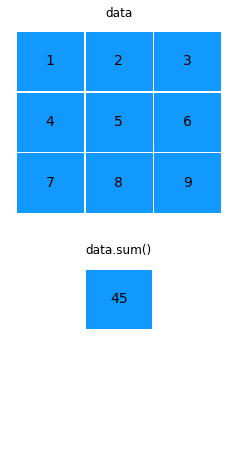

In [24]:
show_array_aggregation(data, None, filename="./figs/array_aggregation_1")

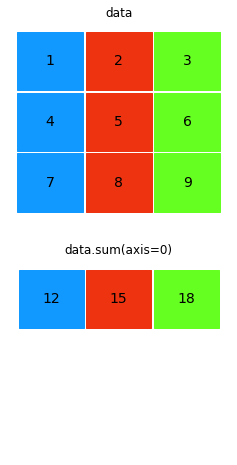

In [25]:
show_array_aggregation(data, 0, filename="./figs/array_aggregation_2")

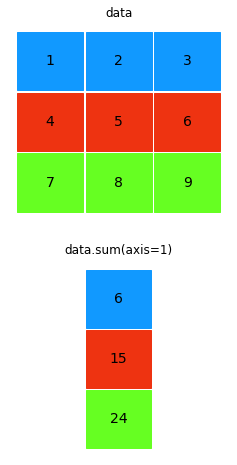

In [26]:
show_array_aggregation(data, 1, filename="./figs/array_aggregation_3")

## Broadcasting

In [27]:
a = np.array([[11, 12, 13], [21, 22, 23], [31, 32, 33]])

In [28]:
b = np.array([[1, 2, 3]])

In [29]:
def show_array_broadcasting(a, b, filename=None):
    """
    Visualize broadcasting of arrays
    """
 
    colors = ['#1199ff', '#eeeeee']
    
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))

    # -- a --
    data = a
    
    ax = axes[0]
    ax.set_frame_on(False)    
    ax.patch.set_facecolor('white')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())

    size = 0.96
    color = colors[0]
    for (m, n), w in np.ndenumerate(data):

        rect = plt.Rectangle([n -size/2, m -size/2],
                             size, size,
                             facecolor=color,
                             edgecolor=color)
        ax.add_patch(rect)
        ax.text(n, m, "%d" % data[m, n], ha='center', va='center', fontsize=14)        

    ax.text(3, 1, "+", ha='center', va='center', fontsize=22)        
    ax.autoscale_view()
    ax.invert_yaxis()

    # -- b --
    data = np.zeros_like(a) + b

    ax = axes[1]
    ax.set_frame_on(False)     
    ax.patch.set_facecolor('white')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())
    
    size = 0.96
    for (m, n), w in np.ndenumerate(data):
        
        if (np.argmax(b.T.shape) == 0 and m == 0) or (np.argmax(b.T.shape) == 1 and n == 0):
            color = colors[0]
        else:
            color = colors[1]
            
        rect = plt.Rectangle([n -size/2, m -size/2],
                             size, size,
                             facecolor=color,
                             edgecolor=color)
        ax.add_patch(rect)

        ax.text(m, n, "%d" % data[n, m], ha='center', va='center', fontsize=14)        

    ax.text(3, 1, "=", ha='center', va='center', fontsize=22)        
    ax.autoscale_view()
    ax.invert_yaxis()

    # -- c --
    data = a + b
    
    ax = axes[2]
    ax.set_frame_on(False) 
    ax.patch.set_facecolor('white')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())
  
    size = 0.96
    color = colors[0]
    for (m, n), w in np.ndenumerate(data):

        rect = plt.Rectangle([n -size/2, m -size/2],
                             size, size,
                             facecolor=color,
                             edgecolor=color)
        ax.add_patch(rect)
        
        ax.text(m, n, "%d" % data[n, m], ha='center', va='center', fontsize=14)        

    ax.autoscale_view()
    ax.invert_yaxis()
    
    #fig.tight_layout()
        
    if filename:
        fig.savefig(filename + ".png", dpi=200)
        fig.savefig(filename + ".svg")
        fig.savefig(filename + ".pdf")

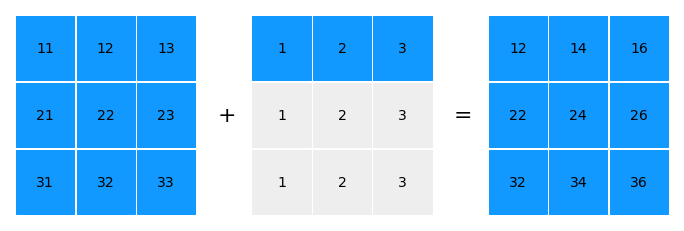

In [30]:
show_array_broadcasting(a, b, filename="./figs/array_broadcasting_1")

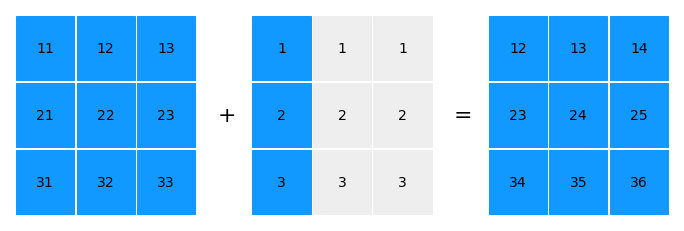

In [31]:
show_array_broadcasting(a, b.T, filename="./figs/array_broadcasting_2")

## Versions

In [32]:
print("numpy: ", np.__version__)
print("matplotlib", mpl.__version__)

numpy:  1.16.5
matplotlib 3.1.1
